# CS345: Assignment 4

## Fall 2021

<!-- Introduction / Setup -->
<!-- Load the dataset -->
<!-- Setup ML Models -->
<!-- Execute Models and Summarize Performance -->
<!-- Conclusions / Observations -->


## Introduction:

In this assignment, we will perform analysis and classification/regression within the [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance). The Student Performance dataset comes from the UCI Dataset Repository with the goal to be able to predict student performance in secondary education. 

When taking a deeper look at the dataset there are two files that we will be performing analysis on: 
1) [student-mat.csv](./student-mat.csv)
    (This file contains data from student performance in a math course).

2) [student-por.csv](./student-por.csv)
    (This file contains data from student performance in a portuguese language course).
    
More information on the attributes can be found in the provided [student.txt](./student.txt) file.

***Note: Many of the analysis will be very similar to Assignment 3 from CS345***

## Loading the dataset

We will be loading the dataset using pandas dataframe. Initially, we will load math scores seperately from portuguese scores, and later join the data together.

### Necessary Imports:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

%matplotlib inline

### Student Math Dataset

In [2]:
student_math  = pd.read_table(r'student-mat.csv', sep=';')
original  = [str for str in student_math.columns]
# We are reordering here since we care mostly about the grade values.
reordered = [original[30], original[31], original[32]] + original[0:30]
student_math  = student_math.reindex(columns=reordered)
student_math.head()

,G1,G2,G3,school,sex,age,address,famsize,Pstatus,Medu,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,5,6,6,GP,F,18,U,GT3,A,4,...,yes,no,no,4,3,4,1,1,3,6
1,5,5,6,GP,F,17,U,GT3,T,1,...,yes,yes,no,5,3,3,1,1,3,4
2,7,8,10,GP,F,15,U,LE3,T,1,...,yes,yes,no,4,3,2,2,3,3,10
3,15,14,15,GP,F,15,U,GT3,T,4,...,yes,yes,yes,3,2,2,1,1,5,2
4,6,10,10,GP,F,16,U,GT3,T,3,...,yes,no,no,4,3,2,1,2,5,4


### Student Portuguese Dataset

In [3]:
student_por  = pd.read_table(r'student-por.csv', sep=';')
original  = [str for str in student_por.columns]
# We are reordering here since we care mostly about the grade values.
reordered = [original[30], original[31], original[32]] + original[0:30]
student_por  = student_por.reindex(columns=reordered)
student_por.head()

,G1,G2,G3,school,sex,age,address,famsize,Pstatus,Medu,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,11,11,GP,F,18,U,GT3,A,4,...,yes,no,no,4,3,4,1,1,3,4
1,9,11,11,GP,F,17,U,GT3,T,1,...,yes,yes,no,5,3,3,1,1,3,2
2,12,13,12,GP,F,15,U,LE3,T,1,...,yes,yes,no,4,3,2,2,3,3,6
3,14,14,14,GP,F,15,U,GT3,T,4,...,yes,yes,yes,3,2,2,1,1,5,0
4,11,13,13,GP,F,16,U,GT3,T,3,...,yes,no,no,4,3,2,1,2,5,0


## Correlation and Shape

The first step in better understanding the dataset is to compute and view the correlation between all features. Below we look at the shape of the dataset and the correlation table. 

In [4]:
print(f'The shape of the math dataset: {student_math.shape}')
student_math.corr()

The shape of the math dataset: (395, 33)


,G1,G2,G3,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
G1,1.000000,0.852118,0.801468,-0.064081,0.205341,0.190270,-0.093040,0.160612,-0.354718,0.022168,0.012613,-0.149104,-0.094159,-0.126179,-0.073172,-0.031003
G2,0.852118,1.000000,0.904868,-0.143474,0.215527,0.164893,-0.153198,0.135880,-0.355896,-0.018281,-0.013777,-0.162250,-0.064120,-0.084927,-0.097720,-0.031777
G3,0.801468,0.904868,1.000000,-0.161579,0.217147,0.152457,-0.117142,0.097820,-0.360415,0.051363,0.011307,-0.132791,-0.054660,-0.051939,-0.061335,0.034247
age,-0.064081,-0.143474,-0.161579,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,0.205341,0.215527,0.217147,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,0.190270,0.164893,0.152457,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,-0.093040,-0.153198,-0.117142,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,0.160612,0.135880,0.097820,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,-0.354718,-0.355896,-0.360415,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.022168,-0.018281,0.051363,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354


In [5]:
print(f'The shape of the portuguese dataset: {student_por.shape}')
student_por.corr()

The shape of the portuguese dataset: (649, 33)


,G1,G2,G3,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
G1,1.000000,0.864982,0.826387,-0.174322,0.260472,0.217501,-0.154120,0.260875,-0.384210,0.048795,-0.094497,-0.074053,-0.195171,-0.155649,-0.051647,-0.147149
G2,0.864982,1.000000,0.918548,-0.107119,0.264035,0.225139,-0.154489,0.240498,-0.385782,0.089588,-0.106678,-0.079469,-0.189480,-0.164852,-0.082179,-0.124745
G3,0.826387,0.918548,1.000000,-0.106505,0.240151,0.211800,-0.127173,0.249789,-0.393316,0.063361,-0.122705,-0.087641,-0.204719,-0.176619,-0.098851,-0.091379
age,-0.174322,-0.107119,-0.106505,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998
Medu,0.260472,0.264035,0.240151,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577
Fedu,0.217501,0.225139,0.211800,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859
traveltime,-0.154120,-0.154489,-0.127173,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149
studytime,0.260875,0.240498,0.249789,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389
failures,-0.384210,-0.385782,-0.393316,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779
famrel,0.048795,0.089588,0.063361,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534


## Visualizing the Data

Recall that G3 scores represents the final grade for students (0 - 20). Below is the distribution of G3 Scores.

In [6]:
def plot_distribution(mathDF, porDF):
    plt.figure(figsize=(14,7))
    plt.hist([mathDF['G3'], porDF['G3']],bins=range(0,22),
             density=True, color=['darkblue', 'orange'], align='left',
             label=['Math', 'Portuguese'])
    plt.title('Distribution of G3 Scores')
    plt.xlabel('Final Grades')
    plt.ylabel('Percent of distribution')
    plt.xticks(range(0,21))
    plt.legend(fontsize='14');

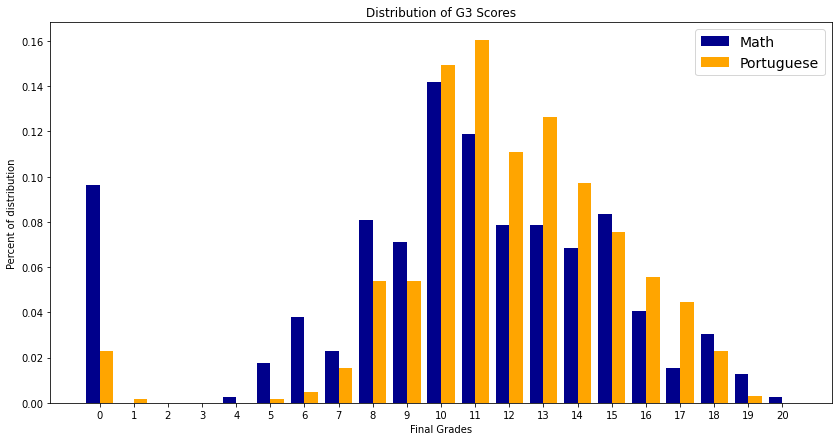

In [7]:
plot_distribution(student_math, student_por)

The G3 Scores follow a normal distribution for both Math and Portugues (Aside from the outliers 0 and 1). 

### Since both Math and Portugues data have the same attributes and follow a similar distribution of G3 scores, we will combine both datasets moving forward.

In [8]:
student_both = pd.concat([student_math, student_por])

# Setting up ML Models

## Here we will also Encode all categorical/binary values to numerical values.

We need to first convert all catergorical values to binary so we can use it for classification/regression. Then we will also convert group G3 scores into the following 4 groups.

* 0-4 -> 0 (represents bad grade)
* 5-9 -> 1 (represents poor grade)
* 10-14 -> 2 (represents fair grade)
* 15-20 -> 3 (represents good grade)

This grouping of G3 scores allows us to more accurately classify the G3 scores by reducing the number of classes possible.

In [9]:
from sklearn.preprocessing import LabelEncoder

labEnc = LabelEncoder()
for feat in student_both:
    if student_both[feat].dtype==object:
        student_both[feat] = labEnc.fit_transform(student_both[feat])
        
student_both.loc[(student_both.G3 >= 0) & (student_both.G3 <= 4), 'G3'] = 0
student_both.loc[(student_both.G3 >= 5) & (student_both.G3 <= 9), 'G3'] = 1
student_both.loc[(student_both.G3 >= 10) & (student_both.G3 <= 14), 'G3'] = 2
student_both.loc[(student_both.G3 >= 15) & (student_both.G3 <= 20), 'G3'] = 3

print("The dataset after preprocessing: ")
student_both

The dataset after preprocessing: 


,G1,G2,G3,school,sex,age,address,famsize,Pstatus,Medu,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,5,6,1,0,0,18,1,0,0,4,...,1,0,0,4,3,4,1,1,3,6
1,5,5,1,0,0,17,1,0,1,1,...,1,1,0,5,3,3,1,1,3,4
2,7,8,2,0,0,15,1,1,1,1,...,1,1,0,4,3,2,2,3,3,10
3,15,14,3,0,0,15,1,0,1,4,...,1,1,1,3,2,2,1,1,5,2
4,6,10,2,0,0,16,1,0,1,3,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,10,11,2,1,0,19,0,0,1,2,...,1,1,0,5,4,2,1,2,5,4
645,15,15,3,1,0,18,1,1,1,3,...,1,1,0,4,3,4,1,1,1,4
646,11,12,1,1,0,18,1,0,1,1,...,1,0,0,1,1,1,1,1,5,6
647,10,10,2,1,1,17,1,1,1,3,...,1,1,0,2,4,5,3,4,2,6


In [10]:
print(f'The shape of both datasets {student_both.shape}')
student_both.corr()

The shape of both datasets (1044, 33)


,G1,G2,G3,school,sex,age,address,famsize,Pstatus,Medu,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
G1,1.000000,0.858739,0.770468,-0.169123,-0.025122,-0.124121,0.113113,0.057610,-0.000155,0.226101,...,0.271476,0.104772,-0.055869,0.036947,-0.051985,-0.101163,-0.150943,-0.142401,-0.060478,-0.092425
G2,0.858739,1.000000,0.856373,-0.144858,-0.025024,-0.119475,0.127793,0.057469,-0.010219,0.224662,...,0.250619,0.122517,-0.097719,0.042054,-0.068952,-0.108411,-0.131576,-0.128114,-0.088001,-0.089332
G3,0.770468,0.856373,1.000000,-0.130031,-0.025274,-0.115073,0.096701,0.066305,-0.033311,0.181894,...,0.228046,0.100765,-0.088221,0.052871,-0.050192,-0.095290,-0.126897,-0.099915,-0.071424,-0.076142
school,-0.169123,-0.144858,-0.130031,1.000000,-0.074955,0.169938,-0.341657,0.034882,0.024030,-0.235114,...,-0.131382,-0.222993,0.074506,-0.036359,0.026008,0.037000,0.066006,0.026539,-0.053214,-0.155146
sex,-0.025122,-0.025024,-0.025274,-0.074955,1.000000,-0.038832,0.011556,0.094361,0.051337,0.109387,...,-0.078775,0.062671,-0.108944,0.074725,0.181603,0.062530,0.275928,0.302623,0.141113,-0.013076
age,-0.124121,-0.119475,-0.115073,0.169938,-0.038832,1.000000,-0.071257,0.013290,0.006887,-0.130196,...,-0.244601,-0.033229,0.173800,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196
address,0.113113,0.127793,0.096701,-0.341657,0.011556,-0.071257,1.000000,0.054484,-0.074097,0.179720,...,0.074716,0.194790,-0.021209,-0.016801,-0.009744,0.030790,-0.064030,-0.043391,-0.010895,0.036696
famsize,0.057610,0.057469,0.066305,0.034882,0.094361,0.013290,0.054484,1.000000,-0.207302,-0.025556,...,0.000650,0.008315,-0.007656,-0.005328,-0.007249,0.005889,0.075646,0.090019,-0.009147,0.018284
Pstatus,-0.000155,-0.010219,-0.033311,0.024030,0.051337,0.006887,-0.074097,-0.207302,1.000000,-0.077133,...,0.007339,0.065260,-0.050021,0.042448,0.038714,0.020498,0.015777,0.047575,0.016213,-0.113955
Medu,0.226101,0.224662,0.181894,-0.235114,0.109387,-0.130196,0.179720,-0.025556,-0.077133,1.000000,...,0.206551,0.249728,-0.008685,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708


Now that we have normalized the data, lets look at the distribution of G3.

In [11]:
def plot_distribution(df, feat):
    plt.figure(figsize=(14,7))
    plt.hist(x=df[feat],bins=range(0,5), rwidth=0.66,
             density=True, color='darkblue', align='left')
    plt.title(f'Distribution of {feat}')
    plt.xlabel(f'{feat}')
    plt.ylabel('Percent of distribution')
    plt.xticks(range(0,4))

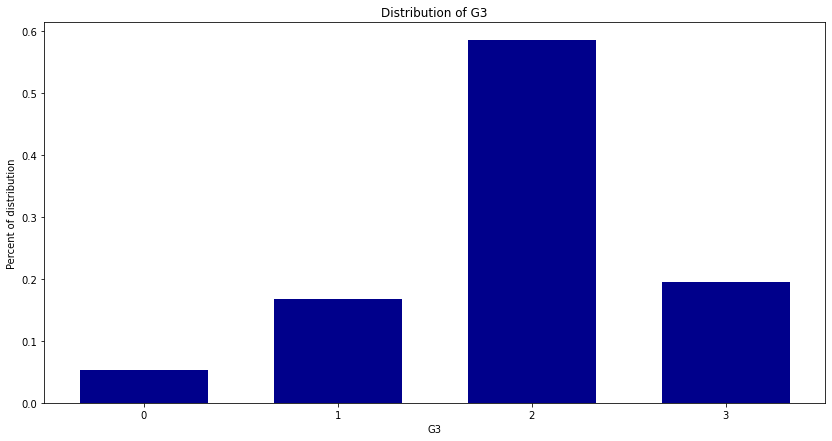

In [12]:
plot_distribution(student_both, 'G3')

# Execute Models and Summarize Performance

## Looking at Univariate Analysis

When looking at the correlation table above, the highest correlation with 'G3' score is both 'G1' and 'G2'. This is to be expected since these two attributes are both considered when 'G3' is created. 

With this, we will choose the next value 'G2' and perform analysis. 


In [13]:
# Code referenced from Assignment3 from CS345 at CSU.

def fit_univariate_model (df, feat):
    X = df[[feat]].values
    y = df['G3'].values
    
    linreg = LinearRegression()
    linreg.fit(X, y)
    return X, y, linreg

In [14]:
Xa, ya, lra = fit_univariate_model(student_both, 'G2')

In [15]:
def plot_regression_results(X, y, lr, xlabel):
    y_pred = lr.predict(X)
    fig, ax = plt.subplots(1, figsize=(12, 5))
    ax.scatter(X, y, color='darkorange')
    ax.scatter(X, y_pred, color='darkblue')
    ax.plot(X, y_pred, color='darkblue')
    ax.set_xticks(range(0,X.max()+2))
    
    ax.set_ylabel('G3')
    ax.set_xlabel(xlabel)
    RMSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    ax.set_title(f'Regression result: RMSE {RMSE:4.2f} MAE {MAE:4.2f}')

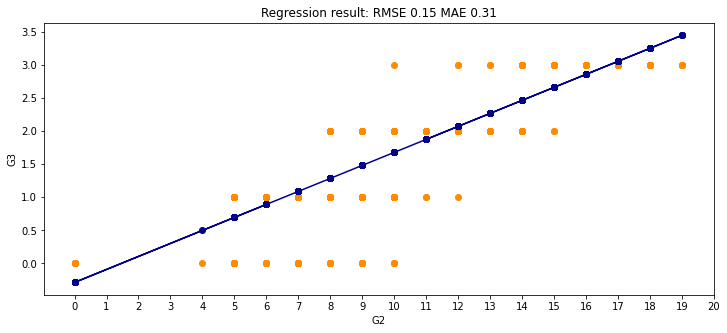

In [16]:
plot_regression_results(Xa, ya, lra, 'G2')

As we can see from the regression plot, the G2 scores range from 0 to 20. The MAE value here of 0.31 means that on average, the regression model can predict G3 from G2 with an average error rate of 0.31.

## Looking at Regression with Ratings

Below we convert the predicted values from our linear regression model to ratings to see our prediction values. 

In [17]:
def y_values_to_ratings (y):
    return y.round(0)

In [18]:
accalr = np.sum(y_values_to_ratings(lra.predict(Xa)) == ya)/ya.shape[0]
print(f'Regression classification accuracy on G2: \t{accalr:5.2f}')

Regression classification accuracy on G2: 	 0.83


As we can see, we still only have a 42 percent accuracy when trying to classify G3 scores using linear regression.

### The next part we will see if any other features have a higher accuracy when trying to classify G3 scores.


In [19]:
def report_univariate_regression_models_accuracy(df):
    classAcc = {}
    for feat in df:
        if(feat == 'G3'):
            continue
        Xa, ya, lra = fit_univariate_model(df, feat)
        accuracy = np.sum(y_values_to_ratings(lra.predict(Xa)) == ya)/ya.shape[0]
        classAcc[feat] = accuracy
    
    for feat, acc in sorted(classAcc.items(), key=lambda x: x[1]):
        print(f'Accuracy {acc:4.2f} for feature {feat}')

In [20]:
report_univariate_regression_models_accuracy(student_both)

Accuracy 0.58 for feature higher
Accuracy 0.58 for feature school
Accuracy 0.58 for feature sex
Accuracy 0.58 for feature age
Accuracy 0.58 for feature address
Accuracy 0.58 for feature famsize
Accuracy 0.58 for feature Pstatus
Accuracy 0.58 for feature Medu
Accuracy 0.58 for feature Fedu
Accuracy 0.58 for feature Mjob
Accuracy 0.58 for feature Fjob
Accuracy 0.58 for feature reason
Accuracy 0.58 for feature guardian
Accuracy 0.58 for feature traveltime
Accuracy 0.58 for feature studytime
Accuracy 0.58 for feature schoolsup
Accuracy 0.58 for feature famsup
Accuracy 0.58 for feature paid
Accuracy 0.58 for feature activities
Accuracy 0.58 for feature nursery
Accuracy 0.58 for feature internet
Accuracy 0.58 for feature romantic
Accuracy 0.58 for feature famrel
Accuracy 0.58 for feature freetime
Accuracy 0.58 for feature goout
Accuracy 0.58 for feature Dalc
Accuracy 0.58 for feature Walc
Accuracy 0.58 for feature health
Accuracy 0.59 for feature absences
Accuracy 0.60 for feature failures
A

As we can see, G2 still has the highest accuracy of prediction when using linear regression classifier.

This is due to G1 and G2 representing the previous grades of students--and usually determines the final grade.

(NOTE: Without grouping G3 into the 4 categories, the accuracy was 0.43 percent for G2).

## What about all features together?

Below we will run Linear Regression classification on all the features together.

In [22]:
def fit_multivariate_model (df) :
    Xall = df[[feat for feat in df if feat != 'G3']].values
    y = df['G3'].values
    
    linreg = LinearRegression()
    linreg.fit(Xall, y)
    
    return Xall, y, linreg

In [23]:
X, y, lr = fit_multivariate_model(student_both)
y_pred = np.round(lr.predict(X))
acc = np.sum(y_pred == y) / len(y)
print(f'The accuracy using all features: \t{acc:1.2f}')

The accuracy using all features: 	0.86


Using all of the features, we can obtain up to a 86 percent accuracy when predicting G3 scores with Linear Regression. 

Next we will show a confusion matrix of all the features together.


In [24]:
# Section from Assignment3 

from sklearn.metrics._plot import confusion_matrix as cm

def make_cm_1(lra, Xa, y) :
    y_pred = y_values_to_ratings(lra.predict(Xa))
    return cm.confusion_matrix(y, y_pred)

def make_quality_text_labels(y) :
    y_ratings = y_values_to_ratings(y)
    return [f'QR {i}' for i in range(5)]

def display_confusion_matrix(lra, Xa, y, title) :
    mat = make_cm_1(lra, Xa, y)
    labels = make_quality_text_labels(y)
    
    cmp = cm.ConfusionMatrixDisplay(mat, display_labels=labels)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_title(title)
    cmp.plot(ax=ax, values_format='')

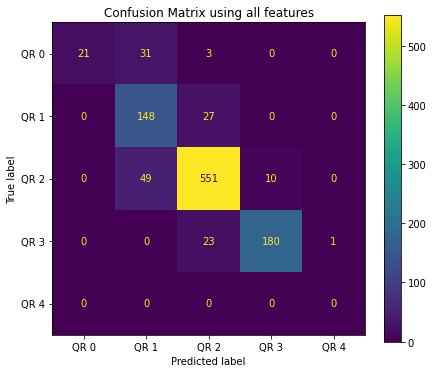

In [25]:
display_confusion_matrix(lr, X, y, 'Confusion Matrix using all features')

What about training and testing the data in a 50/50 split?

In [26]:
def split_50_50(df):
    X = df[[feat for feat in df if feat != 'G3']].values
    y = df['G3'].values
    return train_test_split(X, y, train_size=0.5, random_state=42)

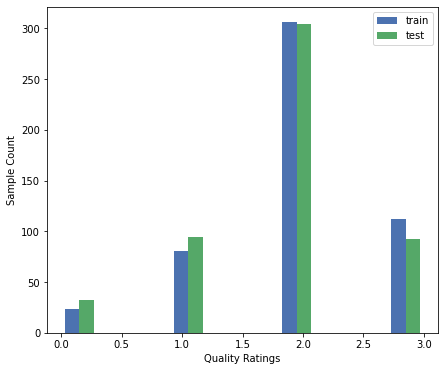

In [27]:
# The follow code is taken from Assignment_3 from CS345 at CSU. 

X_train, X_test, y_train, y_test = split_50_50(student_both)
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(7,6))
ax.hist([y_train, y_test], label=['train','test'])
ax.legend(loc='upper right')
ax.set_xlabel('Quality Ratings')
ax.set_ylabel('Sample Count')
pass

## Below we will split the data in half and run the same Linear Regression model.

In [28]:
def fit_multivariate_model_50_50 (df) :
    X_train, X_test, y_train, y_test = split_50_50(df)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = np.round(linreg.predict(X_test))
    acc = np.sum(y_pred == y_test) / len(y_test)
    print(f'\nThe first split accuracy is: \t{acc:4.2f}\n')
    
    y_pred = np.round(linreg.predict(X_train))
    acc = np.sum(y_pred == y_train) / len(y_train)
    print(f'The second split accuracy is: \t{acc:4.2f}')
    

In [29]:
fit_multivariate_model_50_50(student_both) 


The first split accuracy is: 	0.84

The second split accuracy is: 	0.88


As we can see, the accuracy is greater for the second split but is lower for the first split using Linear Regression.

## What about using K-Nearest_Neighbor classifier instead?

In [30]:
def fit_nearest_neighbor_50_50 (df, k):
    print(f'\nknn for a k of {k}')
    
    X_train, X_test, y_train, y_test = split_50_50(df)
    
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    print(f'The first split accuracy is: \t{np.sum(y_pred == y_test)/len(y_test):5.3f}')
    
    classifier.fit(X_test, y_test)
    y_pred = classifier.predict(X_train)
    print(f'The second split accuracy is: \t{np.sum(y_pred == y_train)/len(y_train):5.3f}')

In [31]:
fit_nearest_neighbor_50_50(student_both, 1)
fit_nearest_neighbor_50_50(student_both, 5)
fit_nearest_neighbor_50_50(student_both, 10)


knn for a k of 1
The first split accuracy is: 	0.755
The second split accuracy is: 	0.761

knn for a k of 5
The first split accuracy is: 	0.793
The second split accuracy is: 	0.808

knn for a k of 10
The first split accuracy is: 	0.812
The second split accuracy is: 	0.826


Using a knn classifier with k being 1, 5, and 10, the highest accuracy seen is 82.6 percent, which still happens to be lower than using the Linear Regression above.

## What about Decision Trees?


In [32]:
def fit_decision_tree(df, depth):
    X = df[[feat for feat in df if feat != 'G3']].values
    y = df['G3'].values
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X,y)
    feature_names = np.array([feat for feat in df if feat != 'G3'])
    plt.figure(figsize=(14,6))
    plot_tree(tree, filled=True, rounded=True, feature_names=feature_names)
    print(f'Training Set Accuracy is: {tree.score(X,y):2.2f} for max depth of {depth}')


Training Set Accuracy is: 0.81 for max depth of 2


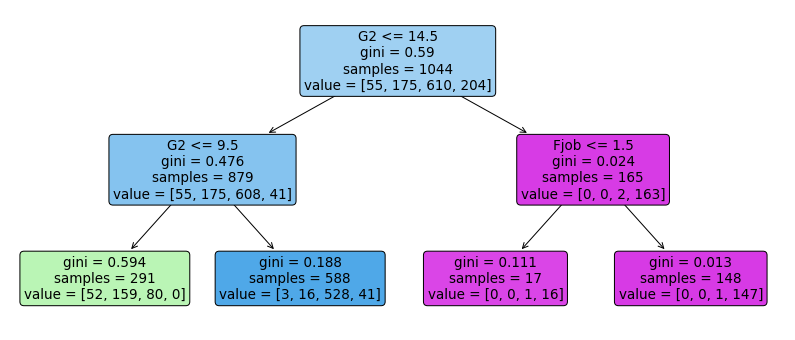

In [33]:
fit_decision_tree(student_both, 2)

Training Set Accuracy is: 0.88 for max depth of 5


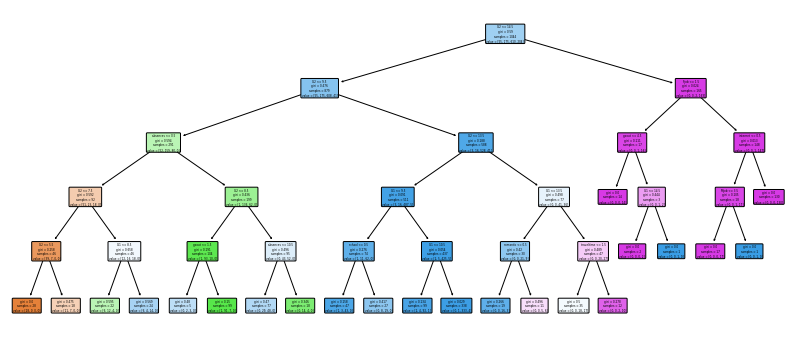

In [34]:
fit_decision_tree(student_both, 5)

As seen above, we can match the 88 percent accuracy seen using linear regression with a decision tree with a max depth of 5. However, we can also get higher accuracy by increasing this value (but the more layers we add, the more we are just creating a table of values).

When running with a depth of 12, we can achieve 100% accuracy (but we are overfitting at this point and no info is learned).

Also note, the Decision Tree above was generated using the entire dataset. The next section we will also split the data into 5 splits and perform cross validation.

In [35]:
X = student_both[[feat for feat in student_both if feat != 'G3']].values
y = student_both['G3'].values
    
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')

print(f'Cross Validation Score for Decision Trees: {np.mean(accuracy)}')

Cross Validation Score for Decision Trees: 0.8113590357011409


As we can see, the accuracy actually dropped when using StatifiedKFold with Decision Trees.

### What about Random Forest?

In [36]:
classifier = RandomForestClassifier(n_estimators=100)

accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print(f'Cross Validation Score for Random Forest: {np.mean(accuracy)}')

Cross Validation Score for Random Forest: 0.844828855355171


Random Forest generates a better Cross Validation Score than Decision Trees

# Conclusion:

As seen from this analysis, we can observe that if we preprocess the G3 scores into 4 groups instead of 20, linear regression classification achieves the highest accuracy of 88 percent. However, if we were to use decision tree classifier with a higher depth than 5, we can achieve a higher accuracy, but at the cost of overfitting the data. 

When we decided to use a KNN classification model, the accuracy was also found to be worse than the other models when trying to predict student's G3 scores. 

### Significance in preprocessing and normalizing the data:

Without grouping G3 scores into the 4 groups, the highest accuracy that linear regression was able to achieve was ~ 40 percent. While I did not show this in the analysis, this shows the significance in preprocessing and setting up the data for machine learning models. 

Another limitation I observed was that G2 and G1 scores were the two most significant contributers in predicting G3 scores. Without these two attributes, the regression and classification models would have only achieved ~60 percent accuracy.

When calculating the accuracy with all of the binary features, they all contained an accuracy of 0.58. This means I did not properly preprocess the data. 